In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv("data/insurance.csv")

In [5]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Data Analysis


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\5kin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

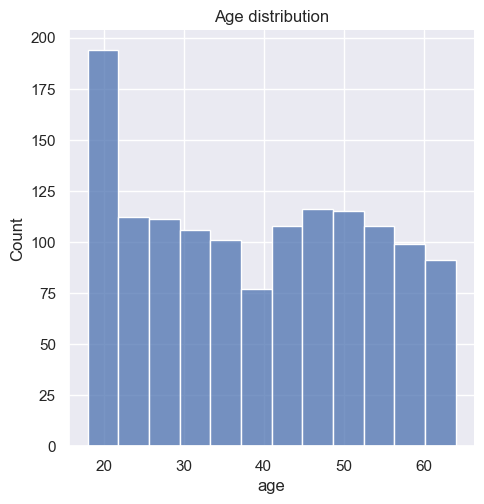

In [11]:
# distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df["age"])
plt.title("Age distribution")
plt.show()

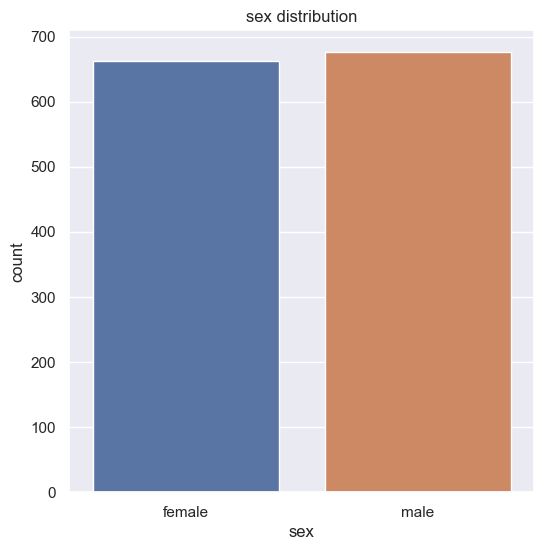

In [13]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("sex distribution")
plt.show()

In [14]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

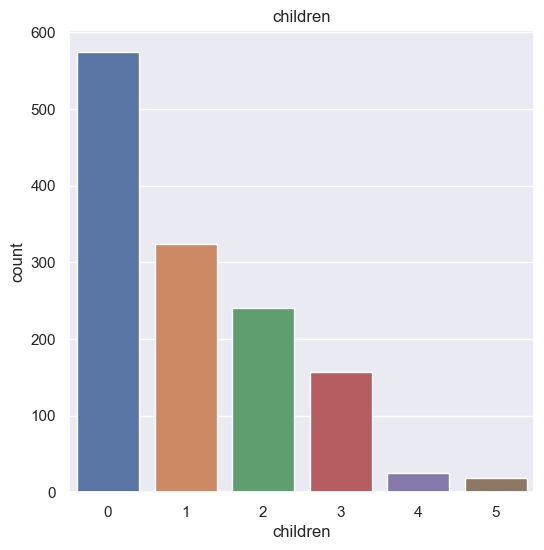

In [15]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("children")
plt.show()

#data preprocessing

encoding the categorical feature

In [18]:
#encoding sex column
df.replace({'sex':{"male":0,"female":1}},inplace=True)


#encoding smoker column
df.replace({'smoker':{"yes":0,"no":1}},inplace=True)


#encoding region column
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [19]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


splitting features and target


In [20]:
x=df.drop(columns='charges',axis=1)

y=df['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

Linear regression

In [25]:
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression()

model evaluation

In [27]:
training_data_prediction=regressor.predict(x_train)

In [29]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [30]:
testing_data_prediction=regressor.predict(x_test)

In [32]:
r2_test=metrics.r2_score(y_test,testing_data_prediction)
print(r2_test)

0.7447273869684077


In [41]:
input_data=(33,	0,	22.705,	0,	1,	3)

In [42]:
input_data_as_numpy_array=np.asarray(input_data)


input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)

print(prediction)

[3869.92920489]


c:\Users\5kin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
